In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
file_path = '/content/USA_Housing.csv'
df = pd.read_csv(file_path)

df = df.iloc[:, :-1]

df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.45857,5.682861,7.009188,4.09,23086.80050
1,79248.64245,6.002900,6.730821,3.09,40173.07217
2,61287.06718,5.865890,8.512727,5.13,36882.15940
3,63345.24005,7.188236,5.586729,3.26,34310.24283
4,59982.19723,5.040555,7.839388,4.23,26354.10947


In [5]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


In [6]:
z_scores = stats.zscore(scaled_data)
filtered_data = scaled_data[(abs(z_scores) < 3).all(axis=1)]

In [7]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(filtered_data)

In [8]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(reduced_data)
    inertia.append(kmeans.inertia_)

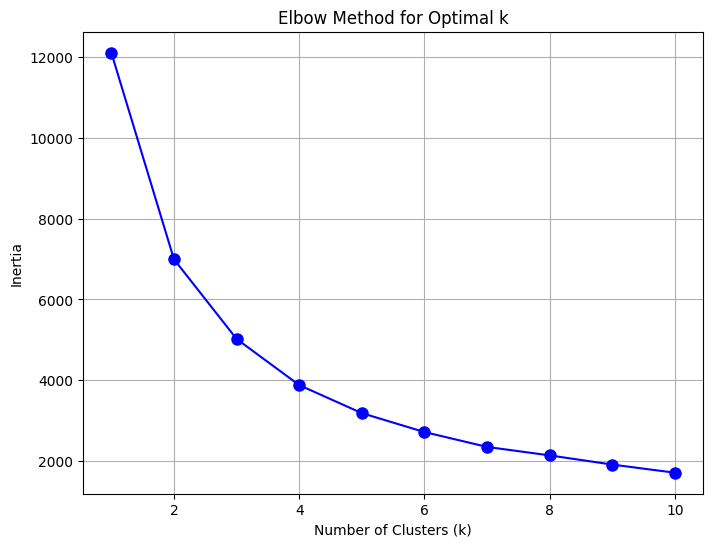

In [9]:
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [10]:
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
cluster_labels = kmeans.fit_predict(reduced_data)

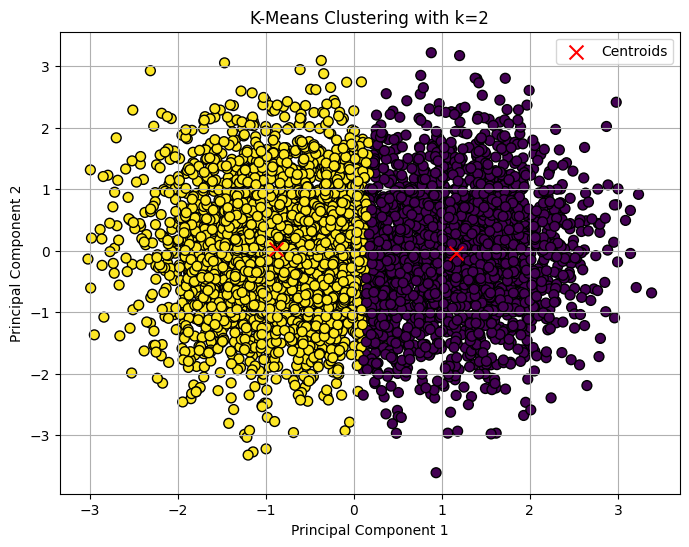

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'K-Means Clustering with k={optimal_k}')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
print(f"Inertia: {inertia}")

Inertia: [12103.782009170143, 6992.792163584022, 5021.806231677426, 3879.49654397298, 3185.867557060956, 2717.7455930076208, 2349.930179570588, 2140.092228509938, 1913.1308633669842, 1711.6226435507049]


In [13]:

from sklearn.metrics import silhouette_score

score = silhouette_score(reduced_data, cluster_labels)
score

0.3842213392003298

In [15]:
for i in range(optimal_k):
    print(f"Cluster {i} size: {np.sum(cluster_labels == i)}")

Cluster 0 size: 2136
Cluster 1 size: 2816


In [16]:
np.random.seed(42)
new_data = np.random.rand(5, df.shape[1]) * 10

In [17]:
scaled_new_data = scaler.transform(new_data)
reduced_new_data = pca.transform(scaled_new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [21]:
# !pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=optimal_k, random_state=42)
kmedoids.fit(reduced_data)
new_labels = kmedoids.predict(reduced_new_data)


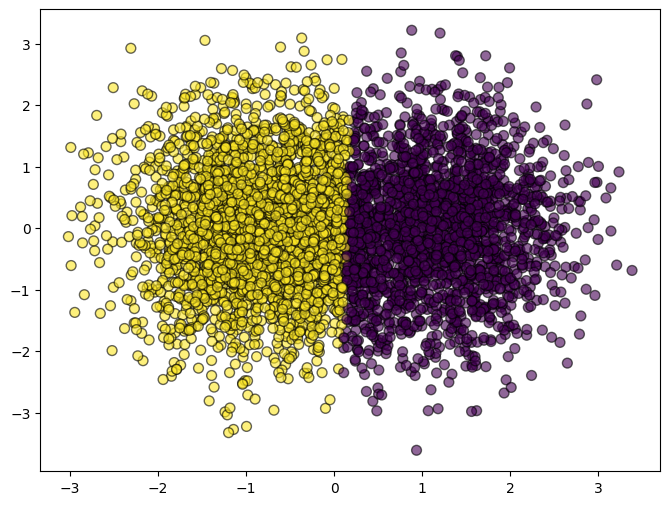

In [22]:
plt.figure(figsize=(8, 6))
# Plot original data
plt.scatter(reduced_data[:, 0], reduced_data[:, 1],
           c=cluster_labels, cmap='viridis',
           marker='o', edgecolor='k', s=50, alpha=0.6)

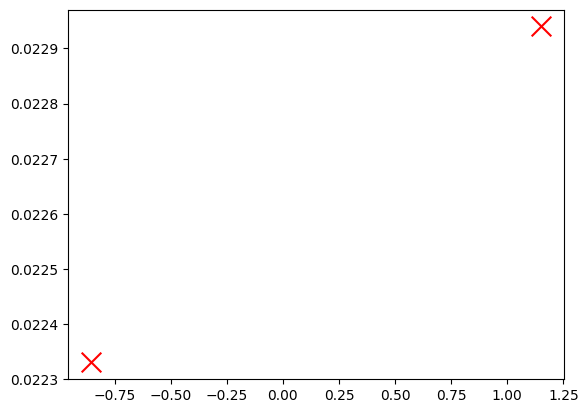

In [23]:
plt.scatter(reduced_data[kmedoids.medoid_indices_, 0],
           reduced_data[kmedoids.medoid_indices_, 1],
           c='red', marker='x', s=200, label='Medoids')

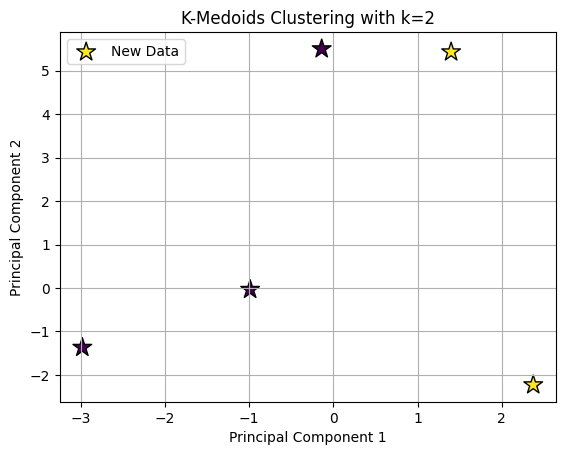

In [24]:
plt.scatter(reduced_new_data[:, 0], reduced_new_data[:, 1],
           c=new_labels, cmap='viridis',
           marker='*', s=200, edgecolor='k', label='New Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'K-Medoids Clustering with k={optimal_k}')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
for i, label in enumerate(new_labels):
    print(f"New data point {i + 1} is predicted to be in cluster {label}")

New data point 1 is predicted to be in cluster 1
New data point 2 is predicted to be in cluster 1
New data point 3 is predicted to be in cluster 0
New data point 4 is predicted to be in cluster 0
New data point 5 is predicted to be in cluster 0
